In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns
import scipy.stats

%matplotlib inline

sns.set_style("ticks")

/nfs/software/stegle/users/acuomo/conda-envs/myscanpy/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
mydir = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/'

In [3]:
metadata_file = mydir+'data/metadata/sample_tracking.tsv'
metadata_df = pd.read_csv(metadata_file, sep='\t')

metadata_df = metadata_df.set_index('sanger_sample_id', drop=False)

# metadata_df = metadata_df[['treatment']]

metadata_df.head()

,sample_id,run,plate_barcode,date_of_submission,name,pool_id,protocol,bio_replicate_id,tech_replicate_id,10x_replicate_id,time_point,treatment,code,sequencescape,sanger_sample_id,number_of_cells_loaded,percentage_survival,comment
sanger_sample_id,,,,,,,,,,,,,,,,,,
5245STDY7352549,cellranger211_count_25419_5245STDY7352549_hg19...,25419,SCGC-10X-00003100,21-02-2018,Pool1_1,pool1,da_neurons,1,1,1,D11,NONE,5245STDY7352549,3571764.0,5245STDY7352549,15480,94.4,NaN
5245STDY7352550,cellranger211_count_25419_5245STDY7352550_hg19...,25419,SCGC-10X-00003101,21-02-2019,Pool1_2,pool1,da_neurons,1,2,1,D11,NONE,5245STDY7352550,3571765.0,5245STDY7352550,11390,91.9,NaN
5245STDY7352551,cellranger211_count_25419_5245STDY7352551_hg19...,25419,SCGC-10X-00003102,21-02-2020,Eipl/Podx,eipl_podx,da_neurons,1,1,1,D11,NONE,5245STDY7352551,3571766.0,5245STDY7352551,17812,94.4,NaN
5245STDY7386983,cellranger211_count_25528_5245STDY7386983_hg19...,25528,SCGC-10X-00003980,21-02-2021,UENN/HECN,uenn_hecn,da_neurons,1,1,1,D11,NONE,5245STDY7386983,3606205.0,5245STDY7386983,11600,93,NaN
5245STDY7386984,cellranger211_count_25528_5245STDY7386984_hg19...,25528,SCGC-10X-00003981,21-02-2022,Pelm/Meue,pelm_meue,da_neurons,1,1,1,D11,NONE,5245STDY7386984,3606206.0,5245STDY7386984,19400,97,NaN


In [4]:
metadata_file = mydir+'data/metadata/sample_tracking.tsv'
metadata_df = pd.read_csv(metadata_file, sep='\t')

metadata_df = metadata_df.set_index('sanger_sample_id', drop=False)

# metadata_df = metadata_df[['treatment']]

metadata_df.head()

,sample_id,run,plate_barcode,date_of_submission,name,pool_id,protocol,bio_replicate_id,tech_replicate_id,10x_replicate_id,time_point,treatment,code,sequencescape,sanger_sample_id,number_of_cells_loaded,percentage_survival,comment
sanger_sample_id,,,,,,,,,,,,,,,,,,
5245STDY7352549,cellranger211_count_25419_5245STDY7352549_hg19...,25419,SCGC-10X-00003100,21-02-2018,Pool1_1,pool1,da_neurons,1,1,1,D11,NONE,5245STDY7352549,3571764.0,5245STDY7352549,15480,94.4,NaN
5245STDY7352550,cellranger211_count_25419_5245STDY7352550_hg19...,25419,SCGC-10X-00003101,21-02-2019,Pool1_2,pool1,da_neurons,1,2,1,D11,NONE,5245STDY7352550,3571765.0,5245STDY7352550,11390,91.9,NaN
5245STDY7352551,cellranger211_count_25419_5245STDY7352551_hg19...,25419,SCGC-10X-00003102,21-02-2020,Eipl/Podx,eipl_podx,da_neurons,1,1,1,D11,NONE,5245STDY7352551,3571766.0,5245STDY7352551,17812,94.4,NaN
5245STDY7386983,cellranger211_count_25528_5245STDY7386983_hg19...,25528,SCGC-10X-00003980,21-02-2021,UENN/HECN,uenn_hecn,da_neurons,1,1,1,D11,NONE,5245STDY7386983,3606205.0,5245STDY7386983,11600,93,NaN
5245STDY7386984,cellranger211_count_25528_5245STDY7386984_hg19...,25528,SCGC-10X-00003981,21-02-2022,Pelm/Meue,pelm_meue,da_neurons,1,1,1,D11,NONE,5245STDY7386984,3606206.0,5245STDY7386984,19400,97,NaN


In [5]:
file = mydir+'data/data_processed/lancaster_organoids/lancaster_organoids.scanpy.w_metadata.w_celltype.scanpy.h5'
adatafull = sc.read(file)

Only considering the two last: ['.scanpy', '.h5'].
Only considering the two last: ['.scanpy', '.h5'].


In [6]:
adatafull.n_obs

11444

In [7]:
adatafull.obs.head()

,batch,donor_id,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mito,n_genes_by_counts,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,pct_counts_in_top_50_genes,pct_counts_mito,sample_id,total_counts,total_counts_mito,cluster_id,time_point,pool_id,treatment,n_counts_all,celltype
index,,,,,,,,,,,,,,,,,,,,
AAACCTGAGCTCCTCT-1-0,0,HPSI1014i-eesb_1,7.633854,8.519391,4.828314,2066,41.936128,51.996008,66.247505,31.177645,2.475050,5245STDY7770225,5010.0,124.0,0,D119,pool4,NONE,5010.0,neural
AAACCTGAGGCTCTTA-1-0,0,HPSI1014i-eesb_1,7.491645,8.318254,4.477337,1792,42.494508,52.745912,68.367098,31.120332,2.123505,5245STDY7770225,4097.0,87.0,0,D119,pool4,NONE,4097.0,neural
AAACCTGAGTACGCGA-1-0,0,HPSI1213i-hehd_1,7.831617,8.721929,1.609438,2518,39.429503,48.916055,61.955990,29.535452,0.065200,5245STDY7770225,6135.0,4.0,0,D119,pool4,NONE,6135.0,neural
AAACCTGCAATGACCT-1-0,0,HPSI1014i-eesb_1,7.886833,9.030496,4.330733,2661,40.165210,51.370765,66.503053,28.385011,0.897881,5245STDY7770225,8353.0,75.0,2,D119,pool4,NONE,8353.0,glial
AAACCTGCACAGACAG-1-0,0,HPSI1213i-hehd_1,7.903966,9.190648,4.369448,2707,51.652387,60.964912,72.246022,36.678907,0.795594,5245STDY7770225,9804.0,78.0,2,D119,pool4,NONE,9804.0,glial


In [8]:
#subsample

fraction = 1.0
adata = sc.pp.subsample(adatafull, fraction, copy=True)

adata.raw = sc.pp.log1p(adata, copy=True)

In [9]:
# order celltypes so that 
celltype_list = ['neural','neuroblast','glial','satellite','mesenchymal','myotubule','PAX7_positive','wnt_positive']
cat_type = pd.CategoricalDtype(categories=celltype_list, ordered=True)
adata.obs['celltype'] = adata.obs['celltype'].astype(cat_type)

In [10]:
# adata.obs['celltype'].cat.categories

In [11]:
old_to_new = dict(
    neural = 'neuron',
    neuroblast = 'intermediate_prog',
    glial = 'radial_glial_prog', 
    satellite = 'satellite', 
    mesenchymal = 'mesenchymal', 
    myotubule = 'myotube',
    PAX7_positive = 'PAX7_positive',
    wnt_positive = 'wnt_positive'
)
adata.obs['celltype_new'] = (
    adata.obs['celltype']
    .map(old_to_new)
    .astype('category')
)

In [12]:
ordering = ['intermediate_prog', 'neuron', 'radial_glial_prog', 'myotube','mesenchymal',
       'satellite','PAX7_positive', 'wnt_positive']

cat_type = pd.CategoricalDtype(categories=ordering,ordered=True)

adata.obs['celltype_new'] = adata.obs['celltype_new'].astype(cat_type)
adata.obs['celltype_new']

index
GCGCGATAGCTAAACA-1-1          myotube
CCCTCCTCATTAGGCT-1-1        satellite
GGGCACTCAAACTGCT-1-0           neuron
GTGCTTCCACTTAAGC-1-1        satellite
TCTGAGAGTCGTGGCT-1-0           neuron
                            ...      
TACTTACTCACAACGT-1-0      mesenchymal
GAACATCCAGCTTCGG-1-0           neuron
GGTGCGTTCACATAGC-1-1     wnt_positive
TCTTTCCAGTTATCGC-1-1    PAX7_positive
CGTTGGGGTTACAGAA-1-0           neuron
Name: celltype_new, Length: 11444, dtype: category
Categories (8, object): [intermediate_prog < neuron < radial_glial_prog < myotube < mesenchymal < satellite < PAX7_positive < wnt_positive]

In [13]:
fig_prefix = ''
# fig_format = 'png'
fig_format = 'pdf'
sc.set_figure_params(dpi_save=300,format=fig_format)
#rcParams['figure.figsize'] = 5,4
rcParams['figure.figsize'] = 6,4

In [14]:
fig_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/main_figures/"
sc.settings.figdir = fig_folder

plotting_fcn = sc.pl.umap

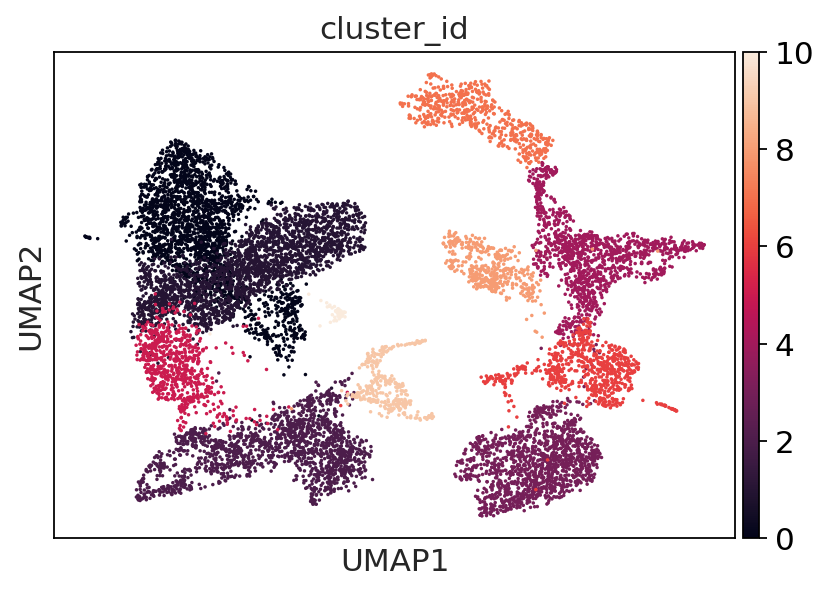

In [15]:
plotting_fcn(adata, color='cluster_id',size=10)

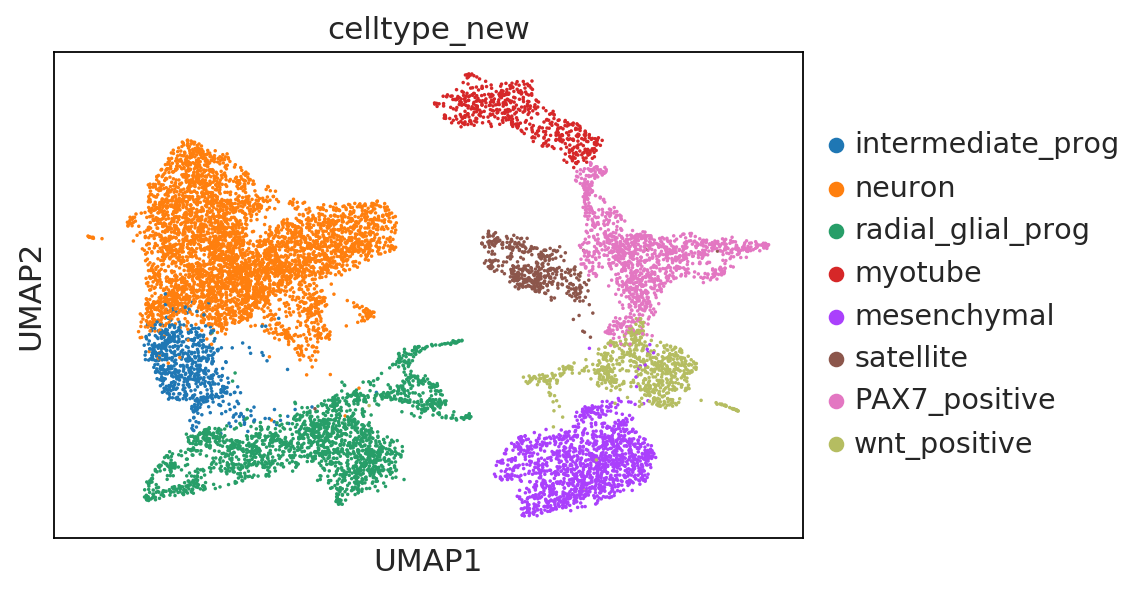

In [16]:
plotting_fcn(adata, color='celltype_new', size=10)

In [17]:
adata.uns['celltype_new_colors']

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61']

In [18]:
adata.obs['celltype_new'].cat.categories

Index(['intermediate_prog', 'neuron', 'radial_glial_prog', 'myotube',
       'mesenchymal', 'satellite', 'PAX7_positive', 'wnt_positive'],
      dtype='object')

In [19]:
col_neural = 'firebrick'
col_ip = 'gold'
col_rgp = 'coral'
col_satellite = '#8c564b'
col_mesenchymal = '#66a5ad'
col_myotubule = '#283655'
col_pax7 =  'darkorchid'
col_wnt = '#b5bd61'

adata.uns['celltype_new_colors'][0] = col_ip
adata.uns['celltype_new_colors'][1] = col_neural
adata.uns['celltype_new_colors'][2] = col_rgp
adata.uns['celltype_new_colors'][3] = col_myotubule
adata.uns['celltype_new_colors'][4] = col_mesenchymal
adata.uns['celltype_new_colors'][5] = col_satellite
adata.uns['celltype_new_colors'][6] = col_pax7
adata.uns['celltype_new_colors'][7] = col_wnt

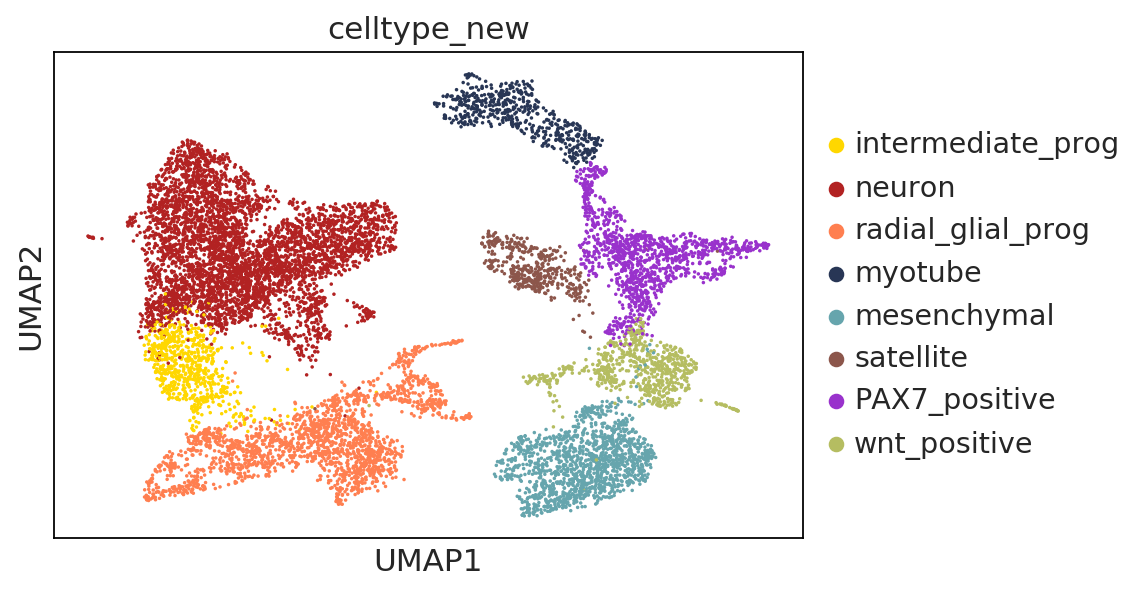

In [20]:
plotting_fcn(adata, color='celltype_new', size=10, save = "Fig_2c_organoid.pdf")

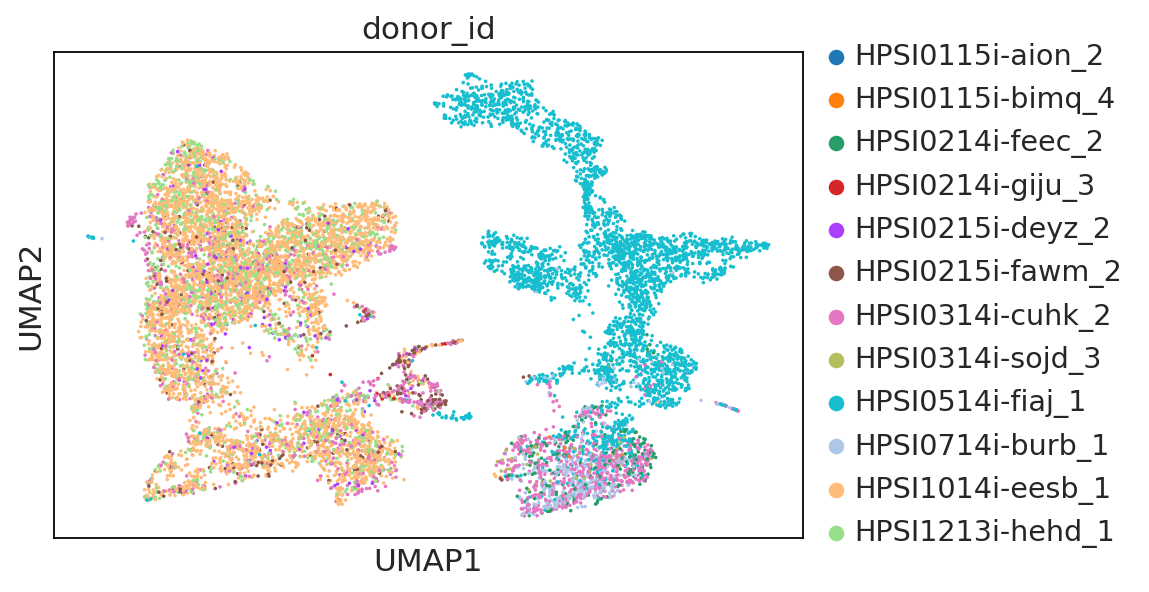

In [21]:
plotting_fcn(adata, color='donor_id', save="organoid_coloured_by_donor")

In [22]:
adata.obs['donor_id'].cat.categories

Index(['HPSI0115i-aion_2', 'HPSI0115i-bimq_4', 'HPSI0214i-feec_2',
       'HPSI0214i-giju_3', 'HPSI0215i-deyz_2', 'HPSI0215i-fawm_2',
       'HPSI0314i-cuhk_2', 'HPSI0314i-sojd_3', 'HPSI0514i-fiaj_1',
       'HPSI0714i-burb_1', 'HPSI1014i-eesb_1', 'HPSI1213i-hehd_1'],
      dtype='object')

In [23]:
adata.uns['donor_id_colors']

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a']

In [24]:
adata.uns['donor_id_colors'][0] = 'lightgrey'
adata.uns['donor_id_colors'][1] = 'lightgrey'
adata.uns['donor_id_colors'][2] = 'lightgrey'
adata.uns['donor_id_colors'][3] = 'lightgrey'
adata.uns['donor_id_colors'][4] = 'lightgrey'
adata.uns['donor_id_colors'][5] = 'lightgrey'
adata.uns['donor_id_colors'][6] = 'lightgrey'
adata.uns['donor_id_colors'][7] = 'lightgrey'
# adata.uns['donor_id_colors'][8] = 'lightgrey'
adata.uns['donor_id_colors'][9] = 'lightgrey'
adata.uns['donor_id_colors'][10] = 'lightgrey'
adata.uns['donor_id_colors'][11] = 'lightgrey'

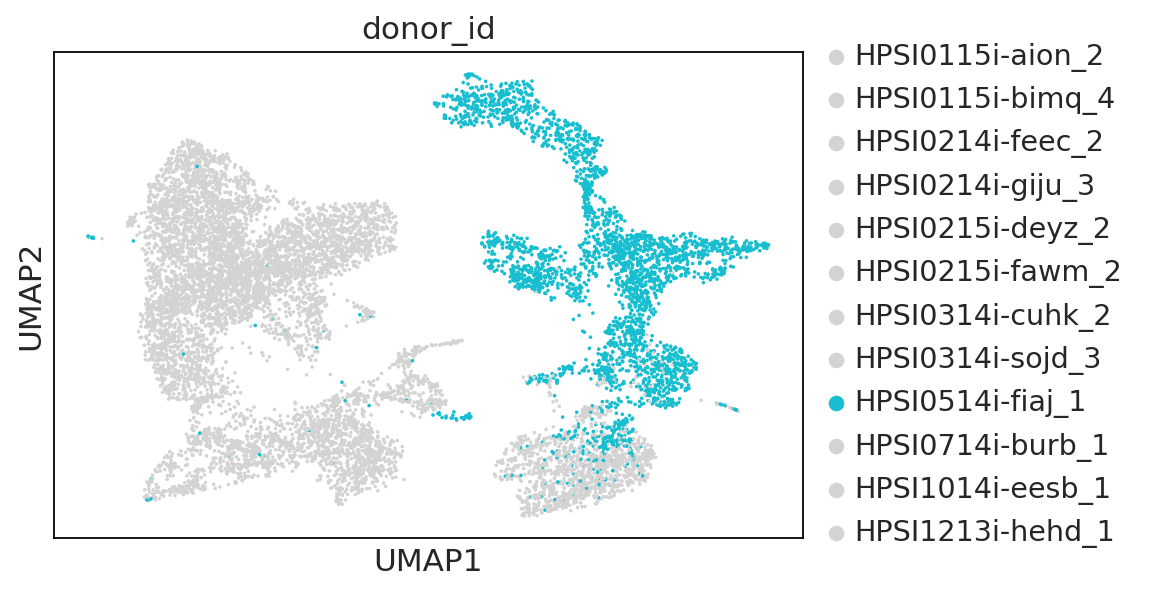

In [25]:
plotting_fcn(adata, color='donor_id', save = "Fig._2e_fiaj.pdf")

In [26]:
adata.uns['donor_id_colors'][0] = 'lightgrey'
adata.uns['donor_id_colors'][1] = 'lightgrey'
adata.uns['donor_id_colors'][2] = 'lightgrey'
adata.uns['donor_id_colors'][3] = 'lightgrey'
adata.uns['donor_id_colors'][4] = 'lightgrey'
adata.uns['donor_id_colors'][5] = 'lightgrey'
adata.uns['donor_id_colors'][6] = 'lightgrey'
adata.uns['donor_id_colors'][7] = 'lightgrey'
adata.uns['donor_id_colors'][8] = 'lightgrey'
adata.uns['donor_id_colors'][9] = 'lightgrey'
adata.uns['donor_id_colors'][10] = 'lightgrey'
adata.uns['donor_id_colors'][11] = 'darkblue'

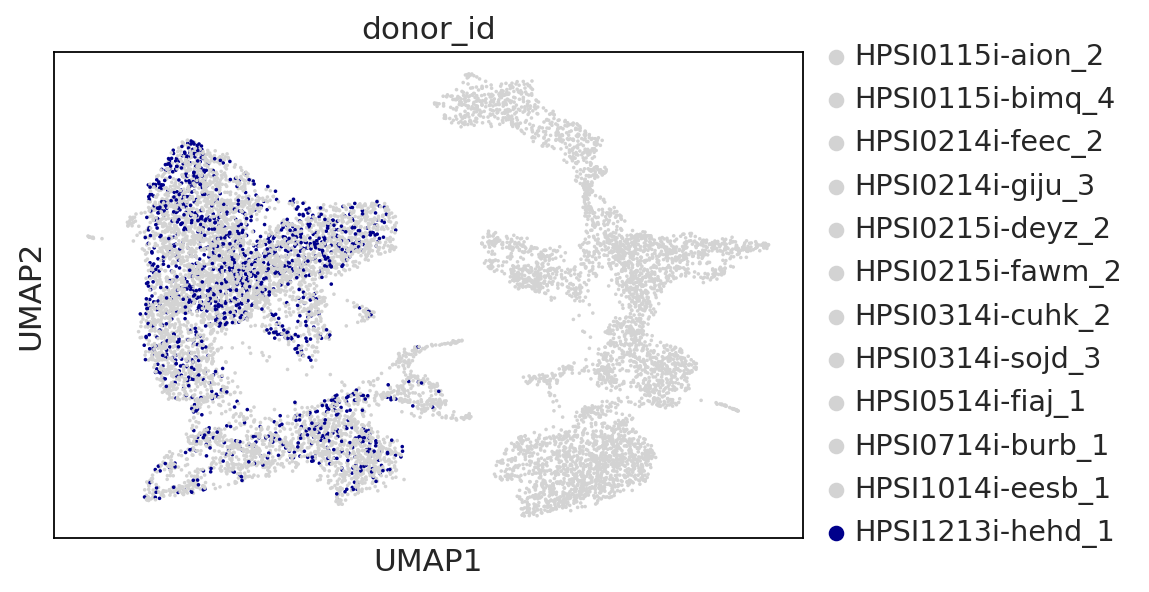

In [27]:
plotting_fcn(adata, color='donor_id', save = "Fig._2e_hehd.pdf")